In [88]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
!mkdir images

하위 디렉터리 또는 파일 images이(가) 이미 있습니다.


In [89]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import pandas as pd
from pandas_datareader import data, wb  
from datetime import datetime

import tensorflow as tf

In [90]:
Data = pd.read_csv('c:/users/yonghyeok/dropbox/machinelearning/RNN/EconForecast2.csv')
Data=Data.drop(0)
data = Data.set_index('Item Name')
data.head(50)

,KOSPI,BondVol,Call1D,Market2yr,GDP,STKturnover,Real_ind,Money,STKvol
Item Name,,,,,,,,,
2000-12-30,504.62,931070,6.01,6.87,576872.8,37.70,52.07,18106.7,7349293.0
2000-12-31,504.62,760313,6.01,6.87,635200.0,26.60,51.74,19005.1,5199282.0
2001-01-01,504.62,760313,6.01,6.87,635200.0,26.60,51.74,19005.1,5199282.0
2001-01-02,520.95,760313,5.26,6.80,635200.0,26.60,51.74,19005.1,5199282.0
2001-01-03,521.43,760313,5.26,6.74,635200.0,26.60,51.74,19005.1,5199282.0
2001-01-04,558.02,760313,5.28,6.47,635200.0,26.60,51.74,19005.1,5199282.0
2001-01-05,580.85,760313,5.32,6.25,635200.0,26.60,51.74,19005.1,5199282.0
2001-01-06,580.85,760313,5.17,6.25,635200.0,26.60,51.74,19005.1,5199282.0
2001-01-07,580.85,760313,5.17,6.25,635200.0,26.60,51.74,19005.1,5199282.0


In [91]:
print(data.shape)

(6177, 9)


In [92]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
x = scaler_x.fit_transform(data)
y = scaler_y.fit_transform(data.iloc[:,[0]]) 

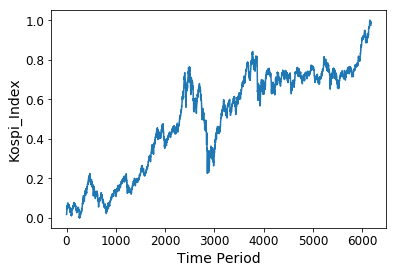

In [93]:
plt.plot(y)
plt.xlabel("Time Period")
plt.ylabel("Kospi_Index")

In [94]:
### Construct input and output sequences
SEQ_LEN = 7
DATA_DIM = 9

# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - SEQ_LEN):
    _x = x[i:i + SEQ_LEN]
    _y = y[i + SEQ_LEN]  
    dataX.append(_x)
    dataY.append(_y)

print (dataX[0])
print (dataX[1])

[[  1.71643827e-02   1.37247120e-03   1.00000000e+00   9.80882864e-01
    0.00000000e+00   2.54220722e-01   7.49359101e-03   0.00000000e+00
    1.33870786e-01]
 [  1.71643827e-02   1.03862685e-03   1.00000000e+00   9.80882864e-01
    5.49972278e-02   1.55589124e-01   9.85998817e-04   1.06761608e-02
    5.35933294e-02]
 [  1.71643827e-02   1.03862685e-03   1.00000000e+00   9.80882864e-01
    5.49972278e-02   1.55589124e-01   9.85998817e-04   1.06761608e-02
    5.35933294e-02]
 [  2.49807343e-02   1.03862685e-03   8.45360825e-01   9.68717414e-01
    5.49972278e-02   1.55589124e-01   9.85998817e-04   1.06761608e-02
    5.35933294e-02]
 [  2.52104863e-02   1.03862685e-03   8.45360825e-01   9.58289885e-01
    5.49972278e-02   1.55589124e-01   9.85998817e-04   1.06761608e-02
    5.35933294e-02]
 [  4.27242833e-02   1.03862685e-03   8.49484536e-01   9.11366006e-01
    5.49972278e-02   1.55589124e-01   9.85998817e-04   1.06761608e-02
    5.35933294e-02]
 [  5.36518588e-02   1.03862685e-03   8.

In [95]:
### Train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
Xtrain, Xtest = np.array(dataX[0:train_size], dtype = 'float32'), np.array(dataX[train_size:len(dataX)], dtype = 'float32')
ytrain, ytest = np.array(dataY[0:train_size], dtype = 'float32'), np.array(dataY[train_size:len(dataY)], dtype = 'float32')

In [96]:
tf.reset_default_graph()

In [97]:
# train Parameters
SEQ_LEN = 7
DATA_DIM = 9
HIDDEN_SIZE = 128
BATCH_SIZE = 100
NUM_EPOCH = 100
D_RATE = 0.1
L_RATE = 0.001

In [98]:
# input place holders
X = tf.placeholder(tf.float32, [None, SEQ_LEN, DATA_DIM])
Y = tf.placeholder(tf.float32, [None, 1])

In [99]:

#BasicRNN은 별로 효과가 좋지 않다.
cell = tf.contrib.rnn.BasicRNNCell(num_units=HIDDEN_SIZE)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
dense = tf.layers.dense(outputs[:,-1], 100)
dropout = tf.layers.dropout(dense, D_RATE)
Y_pred = tf.layers.dense(dropout, 1)
#Dropout효과가 좋다고 알려져 있다.


In [ ]:
"""
cell = tf.contrib.rnn.BasicLSTMCell(num_units=HIDDEN_SIZE, state_is_tuple=True) #128개가 한번에 딱
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
dense = tf.layers.dense(outputs[:,-1], 100)
dropout = tf.layers.dropout(dense, D_RATE)
Y_pred = tf.layers.dense(dropout, 1)
"""

In [ ]:
"""
def lstm_cell():
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=HIDDEN_SIZE, state_is_tuple=True, activation=tf.tanh) 
    cell = tf.contrib.rnn.DropoutWrapper(cell, output_keep_prob=D_RATE)
    return cell

stacked_lstm = tf.contrib.rnn.MultiRNNCell(
     [lstm_cell() for _ in range(2)])

outputs, _states = tf.nn.dynamic_rnn(stacked_lstm, X, dtype=tf.float32)
dense = tf.layers.dense(outputs[:,-1], 100)
Y_pred = tf.layers.dense(dense, 1)
"""

In [100]:
# define loss function 
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares

# optimizer
optimizer = tf.train.AdamOptimizer(L_RATE)
train = optimizer.minimize(loss)

# RMSE
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))
mae=tf.sqrt(tf.reduce_mean(tf.abs(targets-predictions)))

# summary for tensorboard
tf.summary.histogram("rmse", rmse)
tf.summary.scalar("rmse",rmse)
tf.summary.scalar("mae",mae)

merged_summary_op = tf.summary.merge_all()


[step: 0] loss: 0.27010709047317505
[step: 10] loss: 0.017055457457900047
[step: 20] loss: 0.010315291583538055
[step: 30] loss: 0.013359053991734982
[step: 40] loss: 0.007636294700205326
[step: 50] loss: 0.005963989999145269
[step: 60] loss: 0.009630212560296059
[step: 70] loss: 0.005315608344972134
[step: 80] loss: 0.009711463004350662
[step: 90] loss: 0.02675856649875641


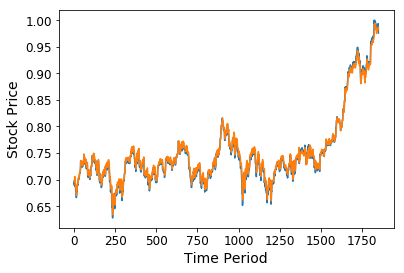

In [101]:
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M:%S")
init = tf.global_variables_initializer()

with tf.Session() as sess:

    sess.run(init)
    #train_writer = tf.summary.FileWriter('./logs/stock_prediction/train/'+now, tf.get_default_graph())
    #test_writer = tf.summary.FileWriter('./logs/stock_prediction/test/'+now, tf.get_default_graph())

    for i in range(NUM_EPOCH):
        
        # mini-batch training
        rnd_idx = np.random.permutation(len(Xtrain))
        #print (rnd_idx)
        for rnd_indices in np.array_split(rnd_idx, len(Xtrain) // BATCH_SIZE):
            X_batch, y_batch = Xtrain[rnd_indices], ytrain[rnd_indices]
            _, step_loss = sess.run([train, loss], feed_dict={X: X_batch, Y: y_batch})
        
        
        train_predict = sess.run(Y_pred, feed_dict={X: Xtrain})
        test_predict = sess.run(Y_pred, feed_dict={X: Xtest})
        
        summary_train = sess.run(merged_summary_op, feed_dict={
                    targets: ytrain, predictions: train_predict})
        summary_test = sess.run(merged_summary_op, feed_dict={
                    targets: ytest, predictions: test_predict})
        
        #train_writer.add_summary(summary_train, i)
        #test_writer.add_summary(summary_test, i)
        
        if i % 10 == 0:
            print("[step: {}] loss: {}".format(i, step_loss))
            
            


# Plot predictions
plt.plot(ytest)
plt.plot(test_predict)
#plt.xlim(0,100)
#plt.ylim(0.0,1.0)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")

In [87]:
test_predict_back = scaler_y.inverse_transform(test_predict)
ytest_back =  scaler_y.inverse_transform(ytest)
mean_absolute_error(test_predict_back, ytest_back), np.mean(test_predict_back / ytest_back) - 1

(11.213206, 0.00061726570129394531)

In [71]:
aa = test_predict_back-ytest_back;aa

array([[  3.01293945],
       [  3.87719727],
       [ 18.57165527],
       ..., 
       [-18.55957031],
       [-17.59863281],
       [ 18.1574707 ]], dtype=float32)

In [82]:
bb= []
for i in range(len(aa)):
    if i%10 == 0:
        bb.append(aa[i][0])

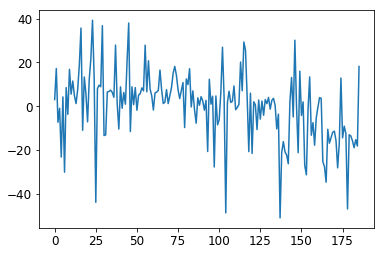

In [83]:
plt.plot(bb)

In [84]:
np.std(aa)

14.94772

In [85]:
np.std(ytest_back)

145.87526

In [86]:
np.std(test_predict_back)

139.19556